In [24]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [25]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [26]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values



X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [27]:
class LinearRegressionGD(object):

  def __init__(self, eta=0.0000028, n_iter=100000, random_state=0):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return self.net_input(X)

In [28]:
def residual_plot(y_train, y_train_pred, y_test, y_test_pred):
  # Residual plot
  plt.scatter(
      y_train_pred,
      y_train_pred - y_train,
      c='blue',
      marker='o',
      label='Training data')
  plt.scatter(
      y_test_pred,
      y_test_pred - y_test,
      c='green',
      marker='s',
      label='Test data')

  plt.xlabel('Predicted values')
  plt.ylabel('Residuals')
  plt.legend(loc='upper left')
  xmin = min(y_train_pred.min(), y_test_pred.min())
  xmax = max(y_train_pred.max(), y_test_pred.max())
  plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')
  plt.xlim([xmin, xmax])
  plt.tight_layout()
  plt.show()
    

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

[Randomreg]
R^2 train: 0.99, test: 0.92


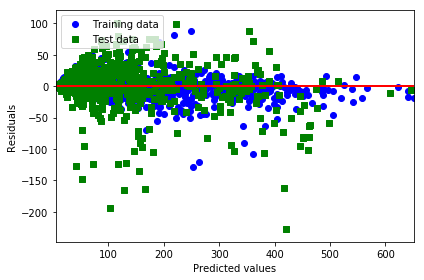

[quartic]
R^2 train: 0.730751, test: 0.722380


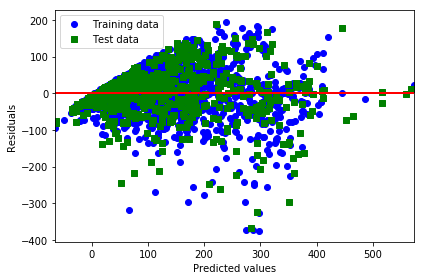

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


print('[Randomreg]')
forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=2)
forest.fit(X_train_std, y_train)
y_train_pred_R = forest.predict(X_train_std)
y_test_pred_R = forest.predict(X_test_std)

print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred_R),
                                       r2_score(y_test, y_test_pred_R)))
residual_plot(y_train, y_train_pred_R, y_test, y_test_pred_R)


print('[quartic]')

regr = LinearRegressionGD()
# Augument and Standardization
cubic = PolynomialFeatures(degree=4)
X_cubic_train = cubic.fit_transform(X_train)
X_cubic_test = cubic.fit_transform(X_test)

sc = StandardScaler()
sc.fit(X_cubic_train)
X_cubic_train_std = sc.transform(X_cubic_train)
X_cubic_test_std = sc.transform(X_cubic_test)

regr = regr.fit(X_cubic_train_std, y_train)
y_train_pred = regr.predict(X_cubic_train_std)
y_test_pred = regr.predict(X_cubic_test_std)

print('R^2 train: %f, test: %f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))
residual_plot(y_train, y_train_pred, y_test, y_test_pred)